<a href="https://colab.research.google.com/github/rajkamaludaya/cv_web_app/blob/main/ImageClassificationUsingFeedForwardNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
labelMap = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [4]:
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


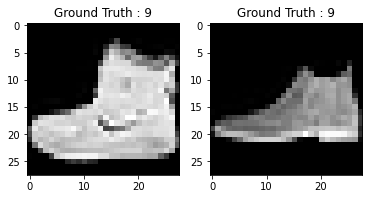

In [6]:
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]));
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]));

Process the data
The images are grayscale and the pixel values range from 0 to 255. We will apply the following preprocessing to the data before feeding it to the network.

Convert each image matrix ( 28x28 ) to an array ( 28*28 = 784 dimenstional ) which will be fed to the network as a single feature.

In [7]:
print('Training image shape : ', train_images.shape[1:])

Training image shape :  (28, 28)


In [8]:
dimData = np.prod(train_images.shape[1:]) #The np. prod() is a numpy mathematical library method that returns the product of the array of elements over a given axis

Data pre-processing

In [9]:
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [10]:
print('Training data shape : ', train_data.shape[0:])

Training data shape :  (60000, 784)


Convert the data to float and scale the values between 0 to 1.

In [11]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

Convert the labels from integer to categorical ( one-hot ) encoding since that is the format required by Keras to perform multiclass classification. One-hot encoding is a type of boolean representation of integer data. It converts the integer to an array of all zeros except a 1 at the index of the integer. For example, using a one-hot encoding for 10 classes, the integer 5 will be encoded as 0000100000

In [12]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  9
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#Training

In [13]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(dimData,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(nClasses,activation='softmax'))


In [16]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=False, 
                   validation_data=(test_data, test_labels_one_hot))

In [24]:
[test_loss,test_acc] = model.evaluate(test_data,test_labels_one_hot,verbose=False)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data : Loss = 0.465009868144989, accuracy = 0.8859999775886536


Text(0.5, 1.0, 'Accuracy Curves')

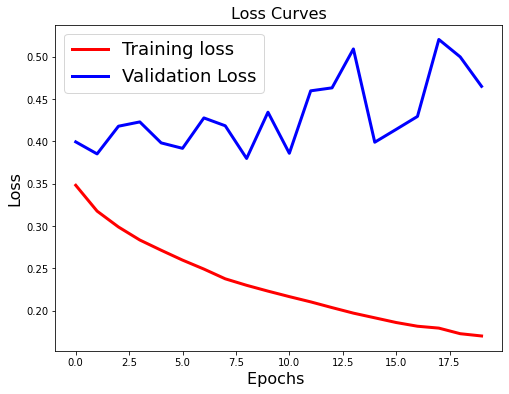

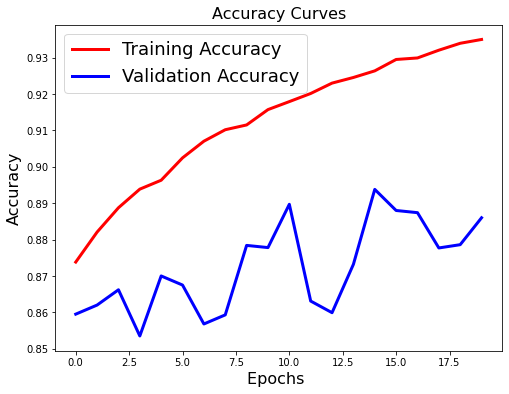

In [25]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [26]:
from tensorflow.keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

In [27]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# To see detail output, change verbose to True
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=False, 
                            validation_data=(test_data, test_labels_one_hot))

Text(0.5, 1.0, 'Accuracy Curves')

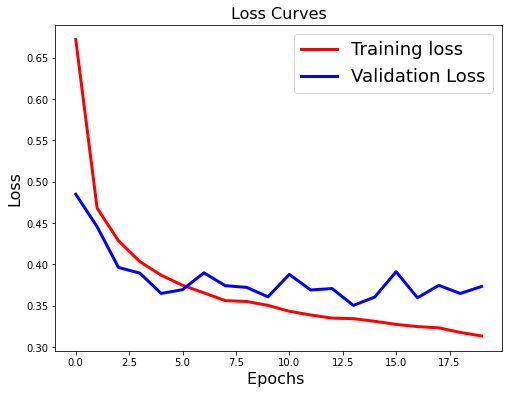

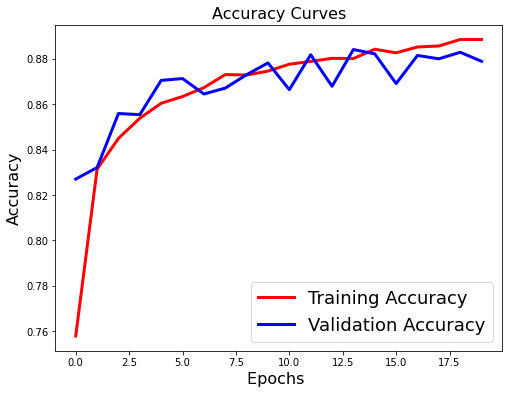

In [28]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['accuracy'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

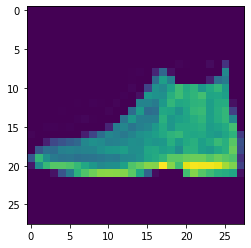

In [31]:
testSample = test_images[0,:,:]
plt.imshow(testSample)

In [47]:
#label = model_reg.predict_classes(test_data[[0],:])[0]
#print("Label = {}, Item = {}".format(label,labelMap[label]))

predict_x=model.predict(test_data[[0],:])[0] # return prob of classes 
print(predict_x)
classes_x=np.argmax(predict_x) #Return max value index
print(classes_x)
print("Label = {}, Item = {}".format(classes_x,labelMap[classes_x]))

[9.8751942e-13 2.4750888e-18 1.0425926e-16 1.2883549e-14 7.8999501e-17
 5.3128688e-09 2.6649499e-12 2.6943180e-06 6.0622398e-15 9.9999726e-01]
9
Label = 9, Item = Ankle boot


In [48]:
# Predict the probabilities for each class 
prob = model_reg.predict(test_data[[0],:])
print(prob)
labelProb = prob[0][classes_x]
print("Probability = {:.3f}".format(labelProb))

[[1.9658911e-10 1.2782320e-14 3.9022396e-12 8.9826133e-12 1.4972335e-12
  2.8011948e-03 5.4292310e-10 5.1553189e-03 2.0225949e-08 9.9204355e-01]]
Probability = 0.992
